### CCFD 2.0

In [1]:
import numpy as np
import pandas as pd
import datetime as DT
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('CCFD_merged_dataset.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Converting DoB to Age

In [3]:
now = pd.Timestamp('now')
data['dob'] = pd.to_datetime(data['dob'])    # 1
data['dob'] = data['dob'].where(data['dob'] < now, data['dob'] -  np.timedelta64(100, 'Y'))   # 2
data['age'] = (now - data['dob']).astype('<m8[Y]')    # 3
print(data)

         Unnamed: 0 trans_date_trans_time        cc_num  \
0                 0         1/1/2019 0:00  2.703190e+15   
1                 1         1/1/2019 0:00  6.304230e+11   
2                 2         1/1/2019 0:00  3.885950e+13   
3                 3         1/1/2019 0:01  3.534090e+15   
4                 4         1/1/2019 0:03  3.755340e+14   
...             ...                   ...           ...   
1604289      555714      12/31/2020 23:59  3.056060e+13   
1604290      555715      12/31/2020 23:59  3.556610e+15   
1604291      555716      12/31/2020 23:59  6.011720e+15   
1604292      555717      12/31/2020 23:59  4.079770e+12   
1604293      555718      12/31/2020 23:59  4.170690e+15   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3      

In [4]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,33.0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42.0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,59.0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,54.0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,35.0


### Converting gender to binary

In [5]:
data ["sex"] = 0

In [6]:
data.loc[data["gender"]== "F", "sex"]= 1  

In [7]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age,sex
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,33.0,1
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,42.0,1
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,59.0,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,54.0,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,35.0,0


In [8]:
data= data.drop(['trans_date_trans_time','cc_num','merchant', 'category','first', 'last', 'gender', 'street', 'job', 'dob', 'trans_num', 'unix_time', 'city', 'state'], axis = 1)

In [9]:
data = data [['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age', 'sex', 'is_fraud']]

In [10]:
data.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,sex,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,33.0,1,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,42.0,1,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,59.0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,54.0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,35.0,0,0


In [11]:
data.describe()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,sex,is_fraud
count,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06
mean,6.997209e+01,4.881581e+04,3.853679e+01,-9.022801e+01,8.876822e+04,3.853670e+01,-9.022818e+01,4.713796e+01,5.478136e-01,5.080740e-03
std,1.588492e+02,2.688324e+04,5.071484e+00,1.374584e+01,3.017287e+05,5.105903e+00,1.375782e+01,1.740951e+01,4.977088e-01,7.109802e-02
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.902742e+01,-1.666716e+02,1.600000e+01,0.000000e+00,0.000000e+00
25%,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,3.473845e+01,-9.690064e+01,3.400000e+01,0.000000e+00,0.000000e+00
50%,4.739000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,3.936759e+01,-8.744167e+01,4.500000e+01,1.000000e+00,0.000000e+00
75%,8.304000e+01,7.204200e+04,4.189480e+01,-8.015800e+01,2.032800e+04,4.195535e+01,-8.024331e+01,5.800000e+01,1.000000e+00,0.000000e+00
max,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,6.751027e+01,-6.695090e+01,9.600000e+01,1.000000e+00,1.000000e+00


### Dividing dataset for training and testing

In [12]:
print('Data Shape:', data.shape)
x = data.iloc[: , :-1]
y = data.iloc[: , -1]
print('X shape:', x.shape)
print('Y shape:', y.shape)

Data Shape: (1604294, 10)
X shape: (1604294, 9)
Y shape: (1604294,)


In [13]:
x, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [14]:
classes = {0:'Not Fraud', 1:'Fraud'}
classes_names = {'Not Fraud', 'Fraud'}
print(data.is_fraud.value_counts().rename(index = classes))

Not Fraud    1596143
Fraud           8151
Name: is_fraud, dtype: int64


In [15]:
x_train, x_test, y_train, y_test = x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0, shuffle= True)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test:', y_test.shape)

x_train shape: (70, 20)
y_train shape: (70,)
x_test shape: (30, 20)
y_test: (30,)


In [16]:
print('Data Shape:', data.shape)
x = data.iloc[: , :-1]
y = data.iloc[: , -1]
print('X shape:', x.shape)
print('Y shape:', y.shape)

Data Shape: (1604294, 10)
X shape: (1604294, 9)
Y shape: (1604294,)


In [17]:
x_train, x_test, y_train, y_test = x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0, shuffle= True)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('x_test shape:', x_test.shape)
print('y_test:', y_test.shape)

x_train shape: (1123005, 9)
y_train shape: (1123005,)
x_test shape: (481289, 9)
y_test: (481289,)


### Logistic Regression

Logistic Regression Train Score: 99.44
Logistic Regression Test Score: 99.45


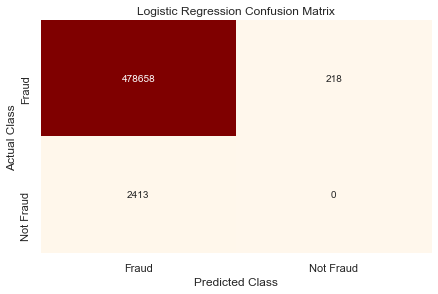

In [18]:
LogisticRegressionModel = LogisticRegression(max_iter=200)
LogisticRegressionModel.fit(x_train, y_train)
LogisticRegressionModel_y_pred = LogisticRegressionModel.predict(x_test)

LogisticRegressionModel_TrainScore = round(LogisticRegressionModel.score(x_train, y_train)* 100, 2)
LogisticRegressionModel_TestScore = round(LogisticRegressionModel.score(x_test, y_test)* 100, 2)

print('Logistic Regression Train Score:', LogisticRegressionModel_TrainScore)
print('Logistic Regression Test Score:', LogisticRegressionModel_TestScore)

LogisticRegressionModel_CM = confusion_matrix(y_test, LogisticRegressionModel_y_pred)
LogisticRegressionModel_ConfusionMatrix = pd. DataFrame(LogisticRegressionModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(LogisticRegressionModel_ConfusionMatrix, annot=True, cbar=None, cmap="OrRd", fmt = 'g')
plt.title("Logistic Regression Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()


### Support Vector Machine

SVC Train Score:  99.5
SVC Test Score:  99.5


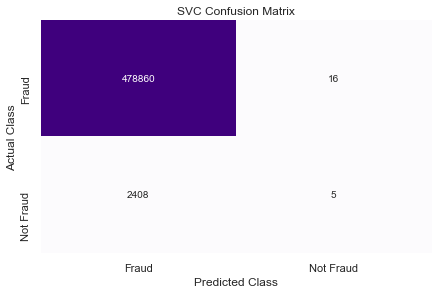

In [19]:
#SVC Model
SVCModel = SVC(kernel= 'rbf', max_iter=300, C=1.0, gamma='auto')
SVCModel.fit(x_train, y_train)
SVCModel_y_pred = SVCModel.predict(x_test)

#Score
SVCModel_TrainScore =  round(SVCModel.score(x_train, y_train) * 100, 2)
SVCModel_TestScore = round(SVCModel.score(x_test, y_test) * 100, 2)

print('SVC Train Score: ', SVCModel_TrainScore)
print('SVC Test Score: ',SVCModel_TestScore)


#Confusion Matrix
SVCModel_CM = confusion_matrix(y_test, SVCModel_y_pred)
SVCModel_ConfusionMatrix = pd.DataFrame(SVCModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(SVCModel_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("SVC Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

### Decision Tree

Decision Tree Train Score:  99.53
Decision Tree Test Score:  99.53


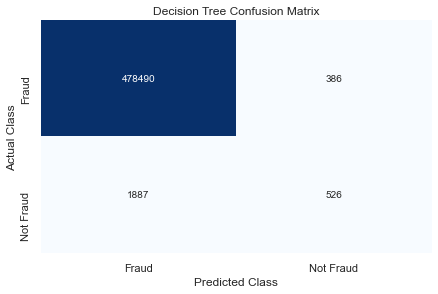

In [20]:
#Decision Tree Model
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=33) #criterion can be entropy
DecisionTreeModel.fit(x_train, y_train)
DecisionTreeModel_y_pred = DecisionTreeModel.predict(x_test)


#Score
DecisionTreeModel_TrainScore =  round(DecisionTreeModel.score(x_train, y_train) * 100, 2)
DecisionTreeModel_TestScore = round(DecisionTreeModel.score(x_test, y_test) * 100, 2)

print('Decision Tree Train Score: ' , DecisionTreeModel_TrainScore)
print('Decision Tree Test Score: ' , DecisionTreeModel_TestScore)


#Confusion Matrix
DecisionTreeModel_CM = confusion_matrix(y_test, DecisionTreeModel_y_pred)
DecisionTreeModel_ConfusionMatrix = pd.DataFrame(DecisionTreeModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(DecisionTreeModel_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Decision Tree Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

### Random Forest

RandomForestModel Train Score:  99.49
RandomForestModel Test Score:  99.5


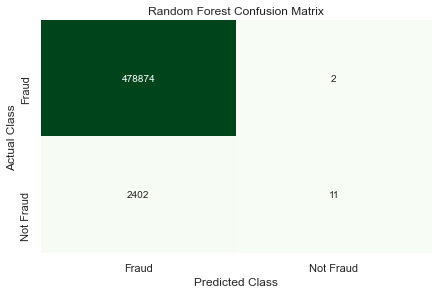

In [21]:
#Random Forest Model
RandomForestModel = RandomForestClassifier(criterion = 'gini',n_estimators=200,max_depth=5,random_state=33, n_jobs=-1)
RandomForestModel.fit(x_train, y_train)
RandomForestModel_y_pred = RandomForestModel.predict(x_test)


#Score
RandomForestModel_TrainScore =  round(RandomForestModel.score(x_train, y_train) * 100, 2)
RandomForestModel_TestScore = round(RandomForestModel.score(x_test, y_test) * 100, 2)

print('RandomForestModel Train Score: ' , RandomForestModel_TrainScore)
print('RandomForestModel Test Score: ' , RandomForestModel_TestScore)


#Confusion Matrix
RandomForestModel_CM = confusion_matrix(y_test, RandomForestModel_y_pred)
RandomForestModel_ConfusionMatrix = pd.DataFrame(RandomForestModel_CM, index=classes_names, columns=classes_names)

sns.heatmap(RandomForestModel_ConfusionMatrix, annot=True, cbar=None, cmap ="Greens", fmt = 'g')
plt.title("Random Forest Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

### Naive Bayes

Bayes Train Score:  99.19
Bayes Test Score:  99.17


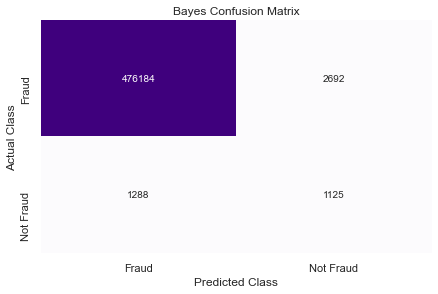

In [22]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
#Predict Output
gauss_pred = gaussian.predict(x_test)

gaussian_TrainScore =  round(gaussian.score(x_train, y_train) * 100, 2)
gaussian_TestScore = round(gaussian.score(x_test, y_test) * 100, 2)

print('Bayes Train Score: ', gaussian_TrainScore)
print('Bayes Test Score: ',gaussian_TestScore)


#Confusion Matrix
gaussian_CM = confusion_matrix(y_test, gauss_pred)
gaussian_ConfusionMatrix = pd.DataFrame(gaussian_CM, index=classes_names, columns=classes_names)

sns.heatmap(gaussian_ConfusionMatrix, annot=True, cbar=None, cmap="Purples", fmt = 'g')

plt.title("Bayes Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

### KNN

classifier created
KNN Train Score:  99.64
KNN Test Score:  99.55


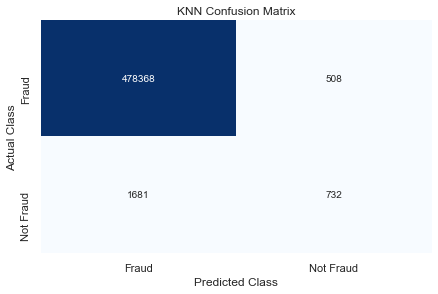

In [23]:
knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
knn.fit(x_train,y_train)
print("classifier created")
knn_y_pred = knn.predict(x_test)
knn_TrainScore = round(knn.score(x_train, y_train) * 100, 2)
knn_TestScore = round(knn.score(x_test, y_test) * 100, 2)

print('KNN Train Score: ' , knn_TrainScore)
print('KNN Test Score: ' , knn_TestScore)


#Confusion Matrix
knn_CM = confusion_matrix(y_test, knn_y_pred)
knn_ConfusionMatrix = pd.DataFrame(knn_CM, index=classes_names, columns=classes_names)

sns.heatmap(knn_ConfusionMatrix, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("KNN Confusion Matrix"), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()


### Comparision between Five algo

In [24]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'K Nearest Neighbour'],
    'Train Score': [LogisticRegressionModel_TrainScore, SVCModel_TrainScore, DecisionTreeModel_TrainScore, RandomForestModel_TrainScore, gaussian_TrainScore, knn_TrainScore],
    'Test Score': [LogisticRegressionModel_TestScore, SVCModel_TestScore, DecisionTreeModel_TestScore, RandomForestModel_TestScore, gaussian_TestScore, knn_TestScore]})

models.sort_values(['Train Score', 'Test Score'], ascending=[False, False])

,Model,Train Score,Test Score
5,K Nearest Neighbour,99.64,99.55
2,Decision Tree,99.53,99.53
1,Support Vector Machines,99.50,99.50
3,Random Forest,99.49,99.50
0,Logistic Regression,99.44,99.45
4,Naive Bayes,99.19,99.17


(Text(771.3750000000001, 0.5, 'Actual Class'),
 Text(0.5, 95.9999999999999, 'Predicted Class'))

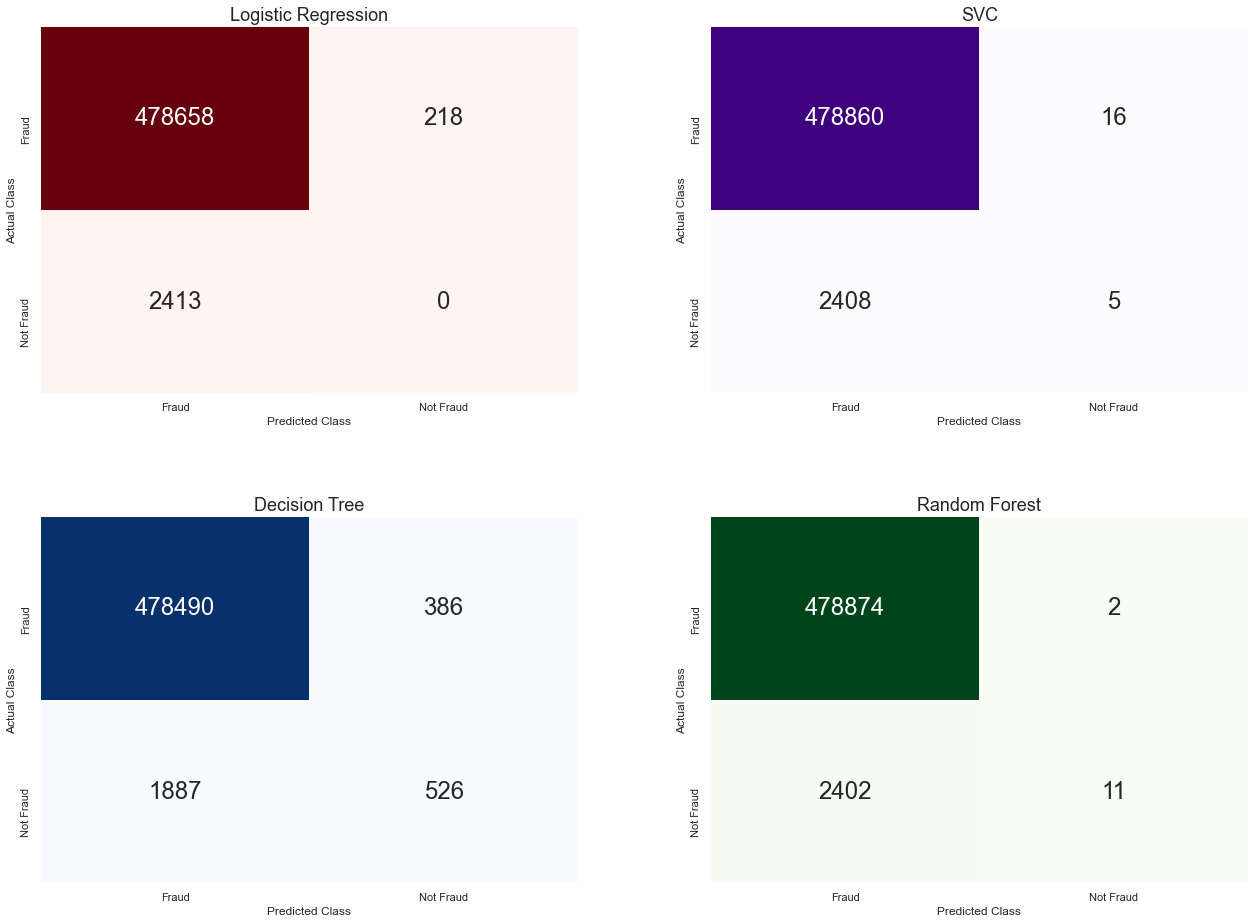

In [25]:
fig, ax = plt.subplots(2, 2,figsize=(20,15))
fig.tight_layout(pad=10.0)
sns.set(font_scale=2)

sns.heatmap(LogisticRegressionModel_ConfusionMatrix, ax=ax[0][0], annot=True, cbar=None, cmap="Reds", fmt = 'g')
ax[0][0].set_title("Logistic Regression", fontsize=18)
ax[0][0].set_ylabel("Actual Class"), ax[0][0].set_xlabel("Predicted Class")


sns.heatmap(SVCModel_ConfusionMatrix, ax=ax[0][1], annot=True, cbar=None, cmap="Purples", fmt = 'g')
ax[0][1].set_title("SVC", fontsize=18)
ax[0][1].set_ylabel("Actual Class"), ax[0][1].set_xlabel("Predicted Class")


sns.heatmap(DecisionTreeModel_ConfusionMatrix, ax=ax[1][0], annot=True, cbar=None, cmap="Blues", fmt = 'g')
ax[1][0].set_title("Decision Tree", fontsize=18)
ax[1][0].set_ylabel("Actual Class"), ax[1][0].set_xlabel("Predicted Class")


sns.heatmap(RandomForestModel_ConfusionMatrix, ax=ax[1][1], annot=True, cbar=None, cmap="Greens", fmt = 'g')
ax[1][1].set_title("Random Forest", fontsize=18),
ax[1][1].set_ylabel("Actual Class"), ax[1][1].set_xlabel("Predicted Class")


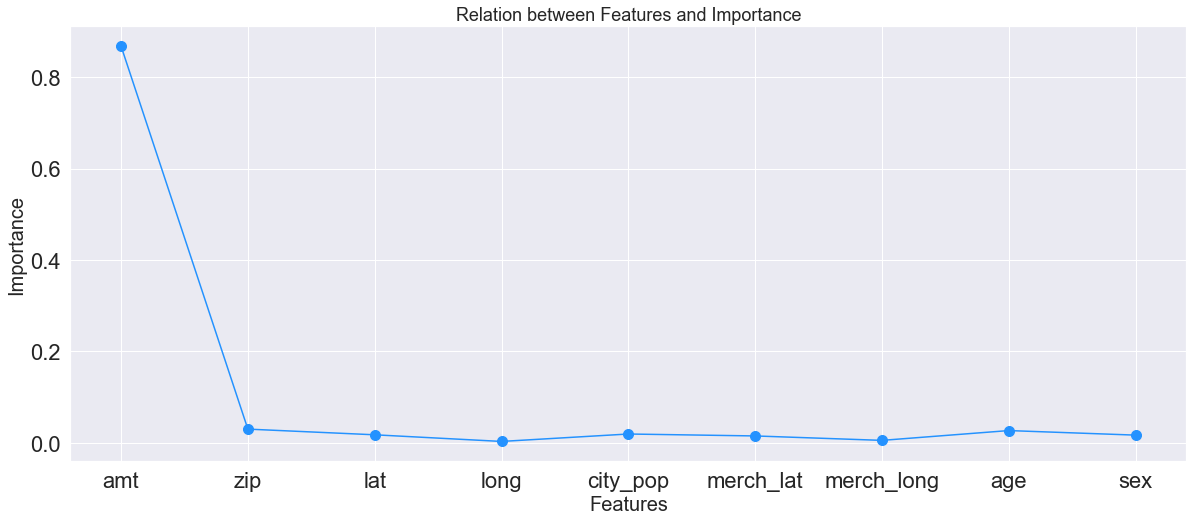

In [26]:
importance = RandomForestModel.feature_importances_

plt.figure(figsize=(20,8))
plt.ylabel('Importance', fontsize=20), plt.xlabel('Features', fontsize=20)
plt.title("Relation between Features and Importance", fontsize=18)
plt.plot(x.columns, importance, 'o-', color="#2492ff", markersize=10, label="Training score")
plt.show()

In [27]:
data = pd.read_csv('CCFD_merged_dataset.csv')
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [28]:
data.describe(include = [np.number])

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06,1.604294e+06
mean,4.389256e+05,4.173928e+17,6.997209e+01,4.881581e+04,3.853679e+01,-9.022801e+01,8.876822e+04,1.357297e+09,3.853670e+01,-9.022818e+01,5.080740e-03
std,2.873162e+05,1.309166e+18,1.588492e+02,2.688324e+04,5.071484e+00,1.374584e+01,3.017287e+05,1.915894e+07,5.105903e+00,1.375782e+01,7.109802e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.005362e+05,1.800430e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.430000e+02,1.341132e+09,3.473845e+01,-9.690064e+01,0.000000e+00
50%,4.010730e+05,3.520550e+15,4.739000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.354658e+09,3.936759e+01,-8.744167e+01,0.000000e+00
75%,6.475008e+05,4.642260e+15,8.304000e+01,7.204200e+04,4.189480e+01,-8.015800e+01,2.032800e+04,1.376492e+09,4.195535e+01,-8.024331e+01,0.000000e+00
max,1.048574e+06,4.992350e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [29]:
data.describe(include = 'O')

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1604294,1604294,1604294,1604294,1604294,1604294,1604294,1604294,1604294,1604294,1604294,1604294
unique,703571,693,14,351,484,2,981,891,51,496,966,1604294
top,12/1/2019 19:27,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,899 Michele View Suite 960,Birmingham,TX,Film/video editor,3/23/1977,0ce7cda828f8972b3e5dd83a3ced8512
freq,17,5380,162800,32961,35540,878854,3847,6922,117124,12059,6960,1


### Dividing dataset into 4 categories; Male, Female, Legit, Fraud

In [30]:
data['target']=0

In [31]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,target
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0


In [32]:
data['class']=0
data.loc[data["is_fraud"]== 1, "class"]= 'Fraud'  
data.loc[data["is_fraud"]== 0, "class"]= 'Legit' 

In [33]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,target,class
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,Legit
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,Legit
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,Legit
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,Legit
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,Legit


In [34]:
data.loc[(data["gender"]== "F") & (data["class"]== "Legit"), "target"]= 1
data.loc[(data["gender"]== "F") & (data["class"]== "Fraud"), "target"]= 2
data.loc[(data["gender"]== "M") & (data["class"]== "Legit"), "target"]= 3
data.loc[(data["gender"]== "M") & (data["class"]== "Fraud"), "target"]= 4

In [35]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,target,class
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,Legit
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,Legit
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,3,Legit
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3,Legit
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,Legit


In [36]:
classes = {2:'Female Victim', 4:'Male Victim'}
classes_names = {'Female Victim', 'Male Victim'}
print(data.target.value_counts().rename(index = classes))

1                874715
3                721428
Female Victim      4139
Male Victim        4012
Name: target, dtype: int64


In [37]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,target,class
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,Legit
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,Legit
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,3,Legit
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3,Legit
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,Legit


In [38]:
now = pd.Timestamp('now')
data['dob'] = pd.to_datetime(data['dob'])    # 1
data['dob'] = data['dob'].where(data['dob'] < now, data['dob'] -  np.timedelta64(100, 'Y'))   # 2
data['age'] = (now - data['dob']).astype('<m8[Y]')    # 3
print(data)

         Unnamed: 0 trans_date_trans_time        cc_num  \
0                 0         1/1/2019 0:00  2.703190e+15   
1                 1         1/1/2019 0:00  6.304230e+11   
2                 2         1/1/2019 0:00  3.885950e+13   
3                 3         1/1/2019 0:01  3.534090e+15   
4                 4         1/1/2019 0:03  3.755340e+14   
...             ...                   ...           ...   
1604289      555714      12/31/2020 23:59  3.056060e+13   
1604290      555715      12/31/2020 23:59  3.556610e+15   
1604291      555716      12/31/2020 23:59  6.011720e+15   
1604292      555717      12/31/2020 23:59  4.079770e+12   
1604293      555718      12/31/2020 23:59  4.170690e+15   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3      

In [39]:
data ["sex"] = 0
data.loc[data["gender"]== "F", "sex"]= 1  
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,target,class,age,sex
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,Legit,33.0,1
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,Legit,42.0,1
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,3,Legit,59.0,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3,Legit,54.0,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,Legit,35.0,0


In [40]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,target,class,age,sex
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,Legit,33.0,1
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,Legit,42.0,1
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,3,Legit,59.0,0
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3,Legit,54.0,0
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,Legit,35.0,0


In [41]:
data= data.drop(['cc_num','merchant', 'category','first', 'last', 'gender', 'street', 'job', 'dob', 'trans_num', 'unix_time', 'city', 'state', 'trans_date_trans_time'], axis = 1)

In [42]:
data=data[['amt','zip','lat','long','city_pop', 'merch_lat','merch_long','target','class','age','sex', 'is_fraud']]

In [43]:
data.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,target,class,age,sex,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,1,Legit,33.0,1,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,1,Legit,42.0,1,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,3,Legit,59.0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,3,Legit,54.0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,3,Legit,35.0,0,0


### Features Analysis

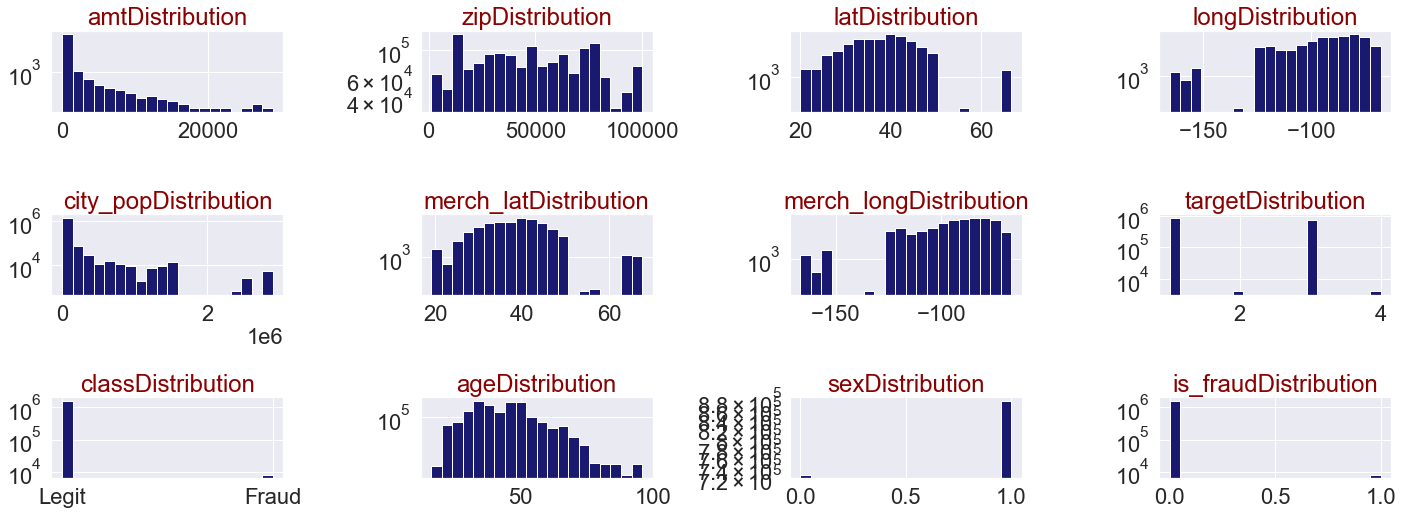

In [44]:
def draw_histograms(data, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        data[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+'Distribution',color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(data,data.columns,8,4)
     

    
        


In [45]:
data.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,target,class,age,sex,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,1,Legit,33.0,1,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,1,Legit,42.0,1,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,3,Legit,59.0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,3,Legit,54.0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,3,Legit,35.0,0,0


In [46]:
col_1= data['target']
col_2= data['is_fraud']
correlation = col_1.corr(col_2)
print(correlation)

0.0769443350045208


In [47]:
col_1= data['is_fraud']
col_2= data['target']
correlation = col_1.corr(col_2)
print(correlation)

0.07694433500452079


In [48]:
col_1= data['age']
col_2= data['is_fraud']
correlation = col_1.corr(col_2)
print(correlation)

0.010011508070874888


In [49]:
data.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,target,class,age,sex,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,1,Legit,33.0,1,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,1,Legit,42.0,1,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,3,Legit,59.0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,3,Legit,54.0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,3,Legit,35.0,0,0


In [50]:
data.corr(method= 'pearson')

,amt,zip,lat,long,city_pop,merch_lat,merch_long,target,age,sex,is_fraud
amt,1.000000,0.001819,-0.000467,-0.000598,0.005220,-0.000389,-0.000597,0.015588,-0.011025,-0.000853,0.206947
zip,0.001819,1.000000,-0.114376,-0.909952,0.077925,-0.113788,-0.909136,-0.065995,0.010566,0.066049,-0.001974
lat,-0.000467,-0.114376,1.000000,-0.014955,-0.154899,0.993584,-0.014928,0.042720,0.047501,-0.042654,0.002697
long,-0.000598,-0.909952,-0.014955,1.000000,-0.052782,-0.014789,0.999118,0.050563,-0.029528,-0.050633,0.001119
city_pop,0.005220,0.077925,-0.154899,-0.052782,1.000000,-0.153980,-0.052757,-0.028814,-0.092257,0.028885,-0.000192
merch_lat,-0.000389,-0.113788,0.993584,-0.014789,-0.153980,1.000000,-0.014765,0.042468,0.047057,-0.042409,0.002583
merch_long,-0.000597,-0.909136,-0.014928,0.999118,-0.052757,-0.014765,1.000000,0.050528,-0.029501,-0.050598,0.001110
target,0.015588,-0.065995,0.042720,0.050563,-0.028814,0.042468,0.050528,1.000000,0.007994,-0.997461,0.076944
age,-0.011025,0.010566,0.047501,-0.029528,-0.092257,0.047057,-0.029501,0.007994,1.000000,-0.007303,0.010012
sex,-0.000853,0.066049,-0.042654,-0.050633,0.028885,-0.042409,-0.050598,-0.997461,-0.007303,1.000000,-0.005747


In [51]:
data.corr(method='kendall')

,amt,zip,lat,long,city_pop,merch_lat,merch_long,target,age,sex,is_fraud
amt,1.000000,0.000883,0.008508,-0.000267,-0.015711,0.008474,-0.000183,0.034289,-0.016424,-0.029691,0.067013
zip,0.000883,1.000000,-0.127599,-0.829775,-0.027030,-0.125905,-0.825255,-0.052827,0.007672,0.052979,-0.001801
lat,0.008508,-0.127599,1.000000,0.084984,-0.176543,0.919675,0.083566,0.040802,0.023854,-0.040885,0.001948
long,-0.000267,-0.829775,0.084984,1.000000,0.060407,0.084052,0.965915,0.048510,-0.013437,-0.048628,0.001893
city_pop,-0.015711,-0.027030,-0.176543,0.060407,1.000000,-0.175724,0.059848,0.033472,-0.104413,-0.033498,0.002145
merch_lat,0.008474,-0.125905,0.919675,0.084052,-0.175724,1.000000,0.082722,0.040445,0.023646,-0.040533,0.001835
merch_long,-0.000183,-0.825255,0.083566,0.965915,0.059848,0.082722,1.000000,0.048244,-0.013246,-0.048364,0.001874
target,0.034289,-0.052827,0.040802,0.048510,0.033472,0.040445,0.048244,1.000000,0.011057,-0.994930,0.076887
age,-0.016424,0.007672,0.023854,-0.013437,-0.104413,0.023646,-0.013246,0.011057,1.000000,-0.010552,0.007942
sex,-0.029691,0.052979,-0.040885,-0.048628,-0.033498,-0.040533,-0.048364,-0.994930,-0.010552,1.000000,-0.005747


In [52]:
data.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,target,class,age,sex,is_fraud
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,1,Legit,33.0,1,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,1,Legit,42.0,1,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,3,Legit,59.0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,3,Legit,54.0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,3,Legit,35.0,0,0


In [53]:
data = pd.read_csv('CCFD_merged_dataset.csv')
data['Cust_Job']=0
data['Tran_Category']=0
data['Cust_City']=0
a=pd.DataFrame(data["job"])
#print(a.describe())
b={}
x=0
for i in a.iterrows():
    if i[1]["job"] in b.keys():
        i[1]["job"]=b[i[1]["job"]]
    else:
        b[i[1]["job"]]=x
        i[1]["job"] = b[i[1]["job"]]
        x+=1

    #print(i[1]["job"])
#print(a)
data['Cust_Job']=a['job']


c=pd.DataFrame(data["category"])
#print(a.describe())
d={}
y=0
for i in c.iterrows():
    if i[1]["category"] in d.keys():
        i[1]["category"]=d[i[1]["category"]]
    else:
        d[i[1]["category"]]=y
        i[1]["category"] = d[i[1]["category"]]
        y+=1

    #print(i[1]["job"])
#print(a.describe())
#print(b)
data['Tran_Category']=c['category']

f=pd.DataFrame(data["city"])
#print(a.describe())
e={}
z=0
for i in f.iterrows():
    if i[1]["city"] in e.keys():
        i[1]["city"]=e[i[1]["city"]]
    else:
        e[i[1]["city"]]=z
        i[1]["city"] = e[i[1]["city"]]
        z+=1

    #print(i[1]["job"])
#print(a.describe())
#print(b)
data['Cust_City']=f['city']
print(data)




         Unnamed: 0 trans_date_trans_time        cc_num  \
0                 0         1/1/2019 0:00  2.703190e+15   
1                 1         1/1/2019 0:00  6.304230e+11   
2                 2         1/1/2019 0:00  3.885950e+13   
3                 3         1/1/2019 0:01  3.534090e+15   
4                 4         1/1/2019 0:03  3.755340e+14   
...             ...                   ...           ...   
1604289      555714      12/31/2020 23:59  3.056060e+13   
1604290      555715      12/31/2020 23:59  3.556610e+15   
1604291      555716      12/31/2020 23:59  6.011720e+15   
1604292      555717      12/31/2020 23:59  4.079770e+12   
1604293      555718      12/31/2020 23:59  4.170690e+15   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3      

In [54]:
data[["Cust_Job", "Tran_Category", "Cust_City"]] = data[["Cust_Job", "Tran_Category", "Cust_City"]].apply(pd.to_numeric)

In [55]:
data['Tran_State']=0
data['Cust_Street']=0
f=pd.DataFrame(data["state"])
#print(a.describe())
e={}
z=0
for i in f.iterrows():
    if i[1]["state"] in e.keys():
        i[1]["state"]=e[i[1]["state"]]
    else:
        e[i[1]["state"]]=z
        i[1]["state"] = e[i[1]["state"]]
        z+=1

    #print(i[1]["job"])
#print(a.describe())
#print(b)
data['Tran_State']=f['state']

u=pd.DataFrame(data["street"])
#print(a.describe())
v={}
y=0
for i in u.iterrows():
    if i[1]["street"] in v.keys():
        i[1]["street"]=v[i[1]["street"]]
    else:
        v[i[1]["street"]]=y
        i[1]["street"] = v[i[1]["street"]]
        y+=1

    #print(i[1]["job"])
#print(a.describe())
#print(b)
data['Cust_Street']=u['street']
print(data)

         Unnamed: 0 trans_date_trans_time        cc_num  \
0                 0         1/1/2019 0:00  2.703190e+15   
1                 1         1/1/2019 0:00  6.304230e+11   
2                 2         1/1/2019 0:00  3.885950e+13   
3                 3         1/1/2019 0:01  3.534090e+15   
4                 4         1/1/2019 0:03  3.755340e+14   
...             ...                   ...           ...   
1604289      555714      12/31/2020 23:59  3.056060e+13   
1604290      555715      12/31/2020 23:59  3.556610e+15   
1604291      555716      12/31/2020 23:59  6.011720e+15   
1604292      555717      12/31/2020 23:59  4.079770e+12   
1604293      555718      12/31/2020 23:59  4.170690e+15   

                                   merchant        category     amt  \
0                fraud_Rippin, Kub and Mann        misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme     grocery_pos  107.23   
2                      fraud_Lind-Buckridge   entertainment  220.11   
3      

In [56]:
data[["Tran_State", "Cust_Street"]] = data[["Tran_State", "Cust_Street"]].apply(pd.to_numeric)

In [57]:
col_1= data['is_fraud']
col_2= data['Cust_Street']
correlation = col_1.corr(col_2)
print(correlation)

0.025184750567377498


In [58]:
col_1= data['is_fraud']
col_2= data['Tran_State']
correlation = col_1.corr(col_2)
print(correlation)

0.002541888395976892


In [59]:
col_1= data['is_fraud']
col_2= data['Cust_Job']
correlation = col_1.corr(col_2)
print(correlation)

0.011689679974291056


In [60]:
col_1= data['is_fraud']
col_2= data['Tran_Category']
correlation = col_1.corr(col_2)
print(correlation)

-0.03635726057716361


In [61]:
col_1= data['is_fraud']
col_2= data['Cust_City']
correlation = col_1.corr(col_2)
print(correlation)

0.02047942386157418


In [62]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,0,0,0,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,1,1,1
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2,2,2,2,2
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3,3,3,3,3
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,4,4,4,4,4


In [63]:
data.head(50)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street
0,0,1/1/2019 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,0,0,0,0
1,1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,1,1,1
2,2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2,2,2,2,2
3,3,1/1/2019 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,3,3,3,3,3
4,4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,4,4,4,4,4
5,5,1/1/2019 0:04,4.767270e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,5,3,5,5,5
6,6,1/1/2019 0:04,3.007470e+13,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,6,5,6,6,6
7,7,1/1/2019 0:05,6.011360e+15,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,7,3,7,4,7
8,8,1/1/2019 0:05,4.922710e+15,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,8,4,8,5,8
9,9,1/1/2019 0:06,2.720830e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,9,1,9,7,9


In [64]:
tt=data.to_csv(r'C:/Users/Md. Kaviul Hossain/Desktop/CCFD_merged_modified_dataset.csv', index = False)

In [65]:
file = 'C:/Users/Md. Kaviul Hossain/Desktop/CCFD_merged_modified_dataset.csv'
data = pd.read_csv(file, sep = ',', parse_dates= ['trans_date_trans_time'],encoding='utf-8-sig', usecols= ['trans_date_trans_time', 'is_fraud', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'Cust_Job', 'Tran_Category', 'Cust_City', 'Tran_State', 'Cust_Street'],)    
data['Month'] = data['trans_date_trans_time'].dt.month

In [66]:
data.head(210000)

,trans_date_trans_time,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street,Month
0,2019-01-01 00:00:00,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,0,0,0,1
1,2019-01-01 00:00:00,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,1,1,1,1,1,1
2,2019-01-01 00:00:00,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2,2,2,2,2,1
3,2019-01-01 00:01:00,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,3,3,3,3,3,1
4,2019-01-01 00:03:00,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,2019-04-17 08:00:00,91.09,14778,42.2701,-78.6847,1453,41.819308,-79.374955,0,183,6,217,27,218,4
209996,2019-04-17 08:00:00,89.86,60091,42.0765,-87.7246,27020,42.430488,-88.275946,0,241,5,439,43,461,4
209997,2019-04-17 08:00:00,115.81,41254,37.8795,-82.7251,571,38.836984,-82.915980,0,355,1,495,26,520,4
209998,2019-04-17 08:01:00,1.33,47838,38.9763,-87.3667,4081,39.736987,-86.902118,0,17,2,17,15,17,4


In [67]:
col_1= data['is_fraud']
col_2= data['Month']
correlation = col_1.corr(col_2)
print(correlation)

-0.01730024550800304


In [68]:
data= data.drop(['trans_date_trans_time'], axis=1)

In [69]:
data.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street,Month
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,0,0,0,1
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,1,1,1,1,1,1
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2,2,2,2,2,1
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,3,3,3,3,3,1
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,4,4,4,4,4,1


In [70]:
data.corr(method= 'pearson')

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street,Month
amt,1.000000,0.001819,-0.000467,-0.000598,0.005220,-0.000389,-0.000597,0.206947,0.003550,-0.059230,0.003198,-0.005870,0.004769,-0.002485
zip,0.001819,1.000000,-0.114376,-0.909952,0.077925,-0.113788,-0.909136,-0.001974,0.014820,-0.000427,-0.040586,-0.014176,-0.028341,0.001274
lat,-0.000467,-0.114376,1.000000,-0.014955,-0.154899,0.993584,-0.014928,0.002697,-0.009821,-0.006704,0.005440,0.123663,-0.020121,0.000084
long,-0.000598,-0.909952,-0.014955,1.000000,-0.052782,-0.014789,0.999118,0.001119,0.007191,0.000890,0.058405,0.084900,0.045762,-0.001380
city_pop,0.005220,0.077925,-0.154899,-0.052782,1.000000,-0.153980,-0.052757,-0.000192,0.018475,0.003707,-0.060097,-0.047540,0.032938,-0.000837
merch_lat,-0.000389,-0.113788,0.993584,-0.014789,-0.153980,1.000000,-0.014765,0.002583,-0.009740,-0.006617,0.005454,0.122754,-0.019864,0.000017
merch_long,-0.000597,-0.909136,-0.014928,0.999118,-0.052757,-0.014765,1.000000,0.001110,0.007198,0.000856,0.058355,0.084827,0.045703,-0.001358
is_fraud,0.206947,-0.001974,0.002697,0.001119,-0.000192,0.002583,0.001110,1.000000,0.011690,-0.036357,0.020479,0.002542,0.025185,-0.017300
Cust_Job,0.003550,0.014820,-0.009821,0.007191,0.018475,-0.009740,0.007198,0.011690,1.000000,0.000019,0.544553,0.054735,0.587509,0.000761
Tran_Category,-0.059230,-0.000427,-0.006704,0.000890,0.003707,-0.006617,0.000856,-0.036357,0.000019,1.000000,-0.003681,-0.003621,-0.002784,0.000117


In [71]:
data['Month-name']=0
data.loc[data["Month"]== 1, "Month-name"]= 'Jan'  
data.loc[data["Month"]== 2, "Month-name"]= 'Feb' 
data.loc[data["Month"]== 3, "Month-name"]= 'March' 
data.loc[data["Month"]== 4, "Month-name"]= 'April' 
data.loc[data["Month"]== 5, "Month-name"]= 'May' 
data.loc[data["Month"]== 6, "Month-name"]= 'June' 
data.loc[data["Month"]== 7, "Month-name"]= 'July' 
data.loc[data["Month"]== 8, "Month-name"]= 'August' 
data.loc[data["Month"]== 9, "Month-name"]= 'Sept' 
data.loc[data["Month"]== 10, "Month-name"]= 'Oct' 
data.loc[data["Month"]== 11, "Month-name"]= 'Nov' 
data.loc[data["Month"]== 12, "Month-name"]= 'Dec' 


In [72]:
data.head(210000)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street,Month,Month-name
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,0,0,0,1,Jan
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,1,1,1,1,1,1,Jan
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2,2,2,2,2,1,Jan
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,3,3,3,3,3,1,Jan
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,4,4,4,4,4,1,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209995,91.09,14778,42.2701,-78.6847,1453,41.819308,-79.374955,0,183,6,217,27,218,4,April
209996,89.86,60091,42.0765,-87.7246,27020,42.430488,-88.275946,0,241,5,439,43,461,4,April
209997,115.81,41254,37.8795,-82.7251,571,38.836984,-82.915980,0,355,1,495,26,520,4,April
209998,1.33,47838,38.9763,-87.3667,4081,39.736987,-86.902118,0,17,2,17,15,17,4,April


In [73]:
data.describe(include='O')

,Month-name
count,1604294
unique,12
top,Dec
freq,280598


In [74]:
classes = {1:'Jan', 2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Dec',12:'Dec',}
classes_names = {'Jan', 'Feb'}
print(data.Month.value_counts().rename(index = classes))

Dec      280598
Aug      176118
July     172444
Dec      143056
Sept     140185
Oct      138106
June     116122
Jan      104727
Feb       97657
March     94671
May       72532
April     68078
Name: Month, dtype: int64


In [75]:
data['Fraudedmonths']=0
data.loc[(data["Month"]== 1) & (data["is_fraud"]== 1), "Fraudedmonths"]= 1
data.loc[(data["Month"]== 2) & (data["is_fraud"]== 1), "Fraudedmonths"]= 2
data.loc[(data["Month"]== 3) & (data["is_fraud"]== 1), "Fraudedmonths"]= 3
data.loc[(data["Month"]== 4) & (data["is_fraud"]== 1), "Fraudedmonths"]= 4
data.loc[(data["Month"]== 5) & (data["is_fraud"]== 1), "Fraudedmonths"]= 5
data.loc[(data["Month"]== 6) & (data["is_fraud"]== 1), "Fraudedmonths"]= 6
data.loc[(data["Month"]== 7) & (data["is_fraud"]== 1), "Fraudedmonths"]= 7
data.loc[(data["Month"]== 8) & (data["is_fraud"]== 1), "Fraudedmonths"]= 8
data.loc[(data["Month"]== 9) & (data["is_fraud"]== 1), "Fraudedmonths"]= 9
data.loc[(data["Month"]== 10) & (data["is_fraud"]== 1), "Fraudedmonths"]=10
data.loc[(data["Month"]== 11) & (data["is_fraud"]== 1), "Fraudedmonths"]=11
data.loc[(data["Month"]== 12) & (data["is_fraud"]== 1), "Fraudedmonths"]=12

In [76]:
data.head(192276)

,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,Cust_Job,Tran_Category,Cust_City,Tran_State,Cust_Street,Month,Month-name,Fraudedmonths
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,0,0,0,0,1,Jan,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,0,1,1,1,1,1,1,Jan,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0,2,2,2,2,2,1,Jan,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0,3,3,3,3,3,1,Jan,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,0,4,4,4,4,4,1,Jan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192271,126.31,13342,42.6315,-75.1866,165,42.936607,-74.661440,0,14,2,113,27,113,4,April,0
192272,918.24,12093,42.4999,-74.6117,1666,43.387595,-74.737753,1,120,6,131,27,132,4,April,4
192273,61.18,85020,33.5623,-112.0559,1312922,32.700559,-112.116647,0,158,8,179,35,180,4,April,0
192274,37.76,15432,40.1151,-79.8627,427,41.014806,-80.310028,0,104,13,110,5,110,4,April,0


In [77]:
classes = {1:'Jan', 2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Dec',12:'Dec',}
classes_names = {'Jan', 'Feb'}
print(data.Fraudedmonths.value_counts().rename(index = classes))

0        1596143
Feb          853
Dec          850
Jan          849
Oct          838
Aug          797
Sept         758
Dec          682
July         652
March        601
June         487
May          408
April        376
Name: Fraudedmonths, dtype: int64


In [78]:
col_1= data['is_fraud']
col_2= data['Fraudedmonths']
correlation = col_1.corr(col_2)
print(correlation)

0.8766849446908236
